In [30]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *

In [31]:
qc = QuantumCircuit() #create a quantumc circuit

In [32]:
qr = QuantumRegister(2,'qreg') #Define a two bit quantum register with name qreg

In [33]:
qc.add_register( qr ) #Add the register to the quantum circuit

qc.qregs # check to see that it has been added

[QuantumRegister(2, 'qreg')]

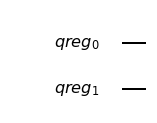

In [34]:
qc.draw(output='mpl') #visualize the circuit which currently has a 2 bit quantum register on it

In [35]:
# At this point you have two qbits in |0> state

In [36]:
qc.h() #this line will error out, you must tell the quantum circuit WHICH bit the H gate acts on

TypeError: h() missing 1 required positional argument: 'q'

In [37]:
qc.h( qr[0] ) #Add an H (Hadamard) gate to the circuit and tell it to ACT on the 0th QBIT in the register

In [38]:
qc.cx( qr[0], qr[1] ); #Add a CX or controlled not gate. When qr[0] == 1, then we NOT qr[1]

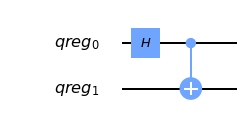

In [39]:
qc.draw(output='mpl') #Visualize the Hadamard NOT gate. When qr[0] == kTRUE, then we NOT[qr[1]]

In [40]:
vector_sim = Aer.get_backend('statevector_simulator') #Time to run some simulation with the statevector simulator

In [41]:
Aer.backends() #List the possible backends of the Aer Simulator (QASM, STATEVECTOR, and UNITARY)

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [42]:
job = execute( qc, vector_sim ) #RUN THE SIMULATION USING THE BACKEND YOU LOADED AND THE circuit you made

In [43]:
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


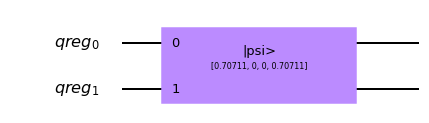

In [44]:
#Initialize a circuit with a pure state 1/sqrt(2) * ( |00> + 0*|01> + 0*|10> + |11>)
new_qc = QuantumCircuit( qr ) #Our register is now the bell state

new_qc.initialize( ket, qr ) #make a state from the bell state

new_qc.draw(output='mpl')

In [45]:
cr = ClassicalRegister(2,'creg') #You DO NOT get state vectors from quantum measurements you get probability distributions!!
# so map QBITS to classical bits or map quantumr registers to classical registers

qc.add_register(cr) #created classical register with name 'creg' and add it to quantum circuit

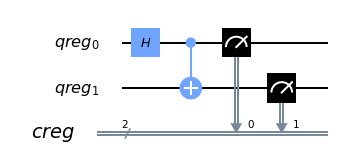

In [46]:
qc.measure(qr[0],cr[0]) #MEASURE THE QUANTUM CIRCUIT (COLLAPSE THE WAVEFUNCTION) BY MAPPING TO CLASSICAL BITS
qc.measure(qr[1],cr[1])

qc.draw(output='mpl')

In [50]:
emulator = Aer.get_backend('qasm_simulator') #GET THE SIMULATOR BACKEND (NO NOISE)

job = execute( qc, emulator, shots=100000 ) #SIMULATE THE QC DRAWN ABOVE FOR 8192 ITERATIONS

In [51]:
hist = job.result().get_counts() #GET THE RESULT OF THE SIMULATOR AND PRINT 
print(hist)

{'00': 49865, '11': 50135}


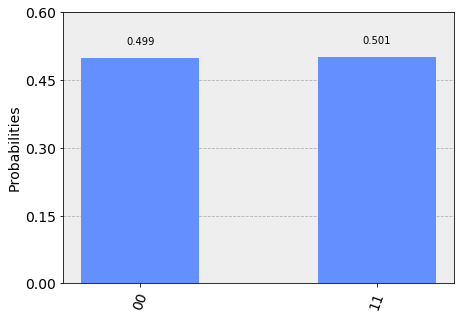

In [52]:
from qiskit.tools.visualization import plot_histogram #PLOT

plot_histogram( hist )

In [53]:
job = execute( qc, emulator, shots=10, memory=True )#FOR 10 shots, get the result and plot
samples = job.result().get_memory()
print(samples) #note 0th bit is on the RIGHT

['00', '00', '11', '00', '00', '11', '11', '11', '11', '00']


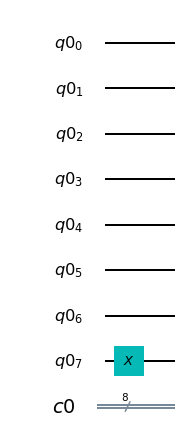

In [54]:
qubit = QuantumRegister(8) #CREATE QUANTUM REGISTER WITH 8 QBITS
bit = ClassicalRegister(8) #CREATE CLASSICAL REGISTER WITH 8 BITS
circuit = QuantumCircuit(qubit,bit)# CREATE THE QUANTUM CIRCUIT WITH THE MAPPING
circuit.x(qubit[7]) #ADD PAULI MATRIX SIGMA_X = { {0,1} , {1,0}}
circuit.draw(output='mpl')

In [56]:
circuit.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once and define the quantum -> classical mapping

execute( circuit, emulator, shots=8192 ).result().get_counts() #note 0th bit is on the right , 7th bit farthest left

{'10000000': 8192}

In [57]:
qc = QuantumCircuit(3)

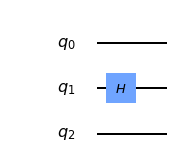

In [58]:
qc.h(1) #add hadamard gate to 1st qbit

qc.draw(output='mpl')

In [59]:
qc = QuantumCircuit(2,1) #define a 2 qbit circuit which maps to 1 classical bit only

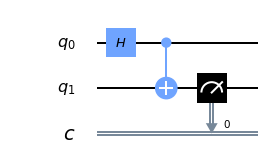

In [60]:
qc.h(0) #add a hadamard gate to qbit 0
qc.cx(0,1) #add a contral not gate with 0th qbit as control and 1st qbit as target
qc.measure(1,0) #make the measurment of the 1st qbit and map to 0th classical bt

qc.draw(output='mpl')

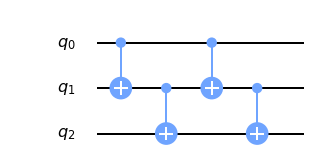

In [61]:
sub_circuit = QuantumCircuit(3, name='toggle_cx') #create 3 bit register
sub_circuit.cx(0,1) #controlled not gate with 0th qbit as control and 1st qbit as target
sub_circuit.cx(1,2) #controlled not gate with 1st qbit as control and 2nd qbit as target
sub_circuit.cx(0,1) #controlled not gate with 2nd qbit as control and 1st qbit as target
sub_circuit.cx(1,2) #controlled not gate with 1st qbit as control and 2nd qbit as target

sub_circuit.draw(output='mpl')

In [62]:
toggle_cx = sub_circuit.to_instruction() #turn this into a gate

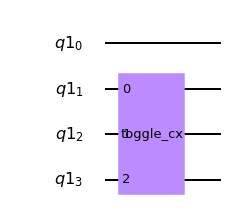

In [63]:
qr = QuantumRegister(4) #create quantum register with 4 qbits
new_qc = QuantumCircuit(qr) #Add 4 qbit register to quantum circuit

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]]) #append custom gate to output of last 3 qbits

new_qc.draw(output='mpl')

In [64]:
IBMQ.load_account() #lets actually access the hardware

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [65]:
provider = IBMQ.get_provider(hub='ibm-q') #check which backends you have available
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [66]:
for backend in provider.backends(): #check what the status of each backend is
    print( backend.status() )

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.0.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.0', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=4, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.0', operational=True, pending_jobs=1, status_msg='active')


In [67]:
real_device = provider.get_backend('ibmq_16_melbourne') #get backend for the 16 qbit device

In [68]:
properties = real_device.properties() #get device properties
coupling_map = real_device.configuration().coupling_map #get coupling map and configuration

In [70]:
from qiskit.providers.aer import noise #import noise functions

noise_model = noise.device.basic_device_noise_model(properties) #create noise model objects

In [71]:
qc = QuantumCircuit(2,2) #create a 2 qbit, 2 classical bit register
qc.x(1) # add a not gate to 1st qbit
qc.measure(0,0) #measure and map zeroth qbit to zeroth classical bit
qc.measure(1,1) #measure and map 1st qbit to first classical bit

job = execute(qc, emulator, shots=1024, noise_model=noise_model,
                    coupling_map=coupling_map,
                    basis_gates=noise_model.basis_gates) #run with realistic noise and coupling as well as basis gate

job.result().get_counts()

{'01': 6, '00': 43, '11': 21, '10': 954}

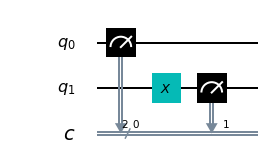

In [72]:
qc.draw(output='mpl')